In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('indian_movies.csv')

In [3]:
df

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi
...,...,...,...,...,...,...,...,...
50597,tt2784720,Sulagte Armaan,1984,-,-,-,Drama,hindi
50598,tt0315201,Aranya,1971,107 min,-,-,Drama,assamese
50599,tt0270221,Balayogini,1936,120 min,-,-,-,telugu
50600,tt0388697,Alajadi,1990,133 min,-,-,Drama,telugu


In [4]:
df = df.drop_duplicates()

In [5]:
df.isnull().sum()

ID                0
Movie Name        0
Year           1561
Timing(min)       0
Rating(10)        0
Votes             0
Genre             0
Language          0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

ID             0
Movie Name     0
Year           0
Timing(min)    0
Rating(10)     0
Votes          0
Genre          0
Language       0
dtype: int64

In [8]:
df = df.drop('ID',axis=1)

In [9]:
df

,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,Dr. Shaitan,1960,-,-,-,-,hindi
1,Nadir Khan,1968,-,-,-,-,urdu
2,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi
...,...,...,...,...,...,...,...
50597,Sulagte Armaan,1984,-,-,-,Drama,hindi
50598,Aranya,1971,107 min,-,-,Drama,assamese
50599,Balayogini,1936,120 min,-,-,-,telugu
50600,Alajadi,1990,133 min,-,-,Drama,telugu


In [10]:
df[df=='-'].count()

Movie Name         0
Year               0
Timing(min)    24700
Rating(10)     25366
Votes          25365
Genre           8478
Language           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49041 entries, 0 to 50601
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie Name   49041 non-null  object
 1   Year         49041 non-null  object
 2   Timing(min)  49041 non-null  object
 3   Rating(10)   49041 non-null  object
 4   Votes        49041 non-null  object
 5   Genre        49041 non-null  object
 6   Language     49041 non-null  object
dtypes: object(7)
memory usage: 3.0+ MB


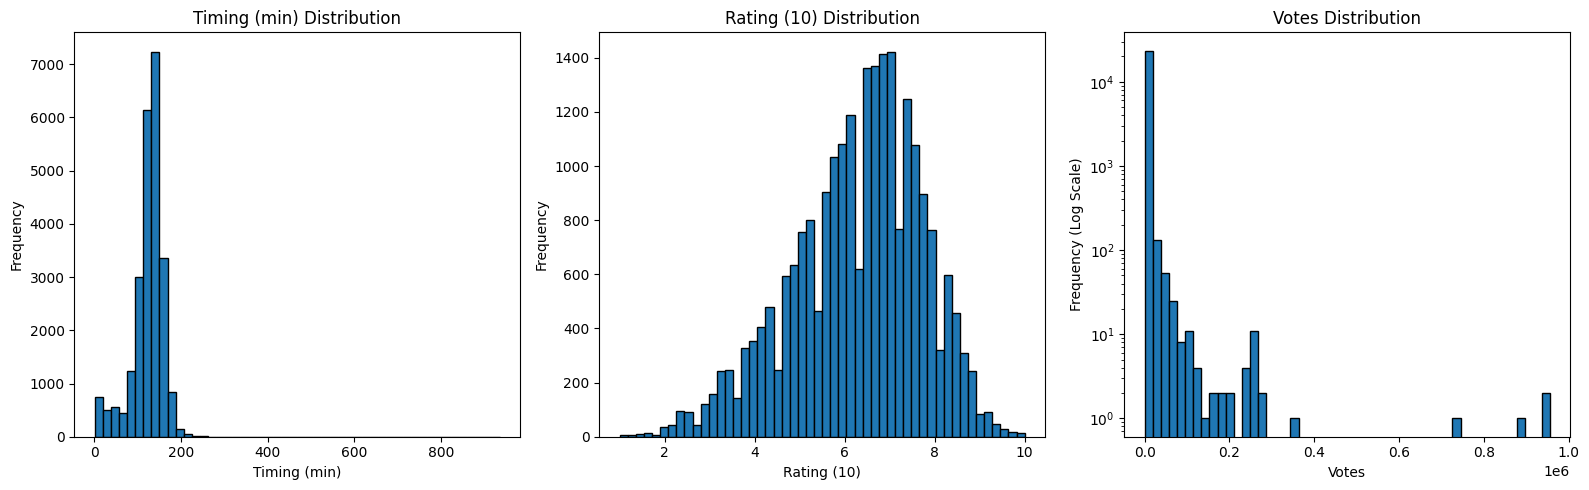

In [12]:
# Preprocess columns
df['Timing(min)'] = df['Timing(min)'].str.replace(' min', '', regex=False)
df['Timing(min)'] = pd.to_numeric(df['Timing(min)'], errors='coerce')
df['Rating(10)'] = pd.to_numeric(df['Rating(10)'], errors='coerce')
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Plot distributions
plt.figure(figsize=(16, 5))

# Timing Distribution
plt.subplot(1, 3, 1)
df['Timing(min)'].plot(kind='hist', bins=50, title='Timing (min) Distribution', edgecolor='black')
plt.xlabel('Timing (min)')
plt.ylabel('Frequency')

# Rating Distribution
plt.subplot(1, 3, 2)
df['Rating(10)'].plot(kind='hist', bins=50, title='Rating (10) Distribution', edgecolor='black')
plt.xlabel('Rating (10)')
plt.ylabel('Frequency')

# Votes Distribution
plt.subplot(1, 3, 3)
df['Votes'].plot(kind='hist', bins=50, title='Votes Distribution', edgecolor='black', logy=True)
plt.xlabel('Votes')
plt.ylabel('Frequency (Log Scale)')

plt.tight_layout()
plt.show()

### Observations

#### Timing (min)
- The distribution is slightly skewed, with most movies clustering around typical runtimes (e.g., **90–150 minutes**).
- Some **extreme values** may exist (very short or very long movies).

#### Rating (10)
- The distribution is **bell-shaped**, peaking around average ratings (e.g., **5–8**).
- Ratings below **3** or above **9** are less frequent.

#### Votes
- The distribution is **heavily right-skewed**.
- A few **blockbusters** have a very high number of votes, while most movies have relatively few votes.


Based on these distributions:

> Timing (min): Impute missing values using the median within groups (e.g., by Genre or Year).
> 
> Rating (10): Use the mean or median, as the distribution is roughly symmetric.
> 
> Votes: Use the median, as the heavy skew makes the mean unreliable.

In [13]:
df['Genre'].unique()

array(['-', 'Comedy, Musical, Romance            ',
       'Comedy, Drama, Family            ', 'Thriller            ',
       'Drama            ', 'Biography, Drama, History            ',
       'Action            ', 'Comedy            ',
       'Short, Music            ', 'Biography, History            ',
       'Action, Thriller            ',
       'Comedy, Drama, Romance            ',
       'Crime, Drama, Romance            ', 'Documentary            ',
       'Romance            ', 'Horror            ',
       'Action, Crime, Musical            ',
       'Family, Romance            ', 'Action, Crime, Drama            ',
       'Drama, Romance            ', 'Comedy, Drama            ',
       'Action, Comedy, Fantasy            ', 'Musical            ',
       'Drama, Musical            ', 'Short, Drama, Thriller            ',
       'Action, Comedy, Mystery            ',
       'Musical, Romance            ',
       'Action, Comedy, Drama            ',
       'Drama, Family, Fan

In [14]:
df['Genre']=df['Genre'].str.strip()

In [15]:
df['Genre'].unique()

array(['-', 'Comedy, Musical, Romance', 'Comedy, Drama, Family',
       'Thriller', 'Drama', 'Biography, Drama, History', 'Action',
       'Comedy', 'Short, Music', 'Biography, History', 'Action, Thriller',
       'Comedy, Drama, Romance', 'Crime, Drama, Romance', 'Documentary',
       'Romance', 'Horror', 'Action, Crime, Musical', 'Family, Romance',
       'Action, Crime, Drama', 'Drama, Romance', 'Comedy, Drama',
       'Action, Comedy, Fantasy', 'Musical', 'Drama, Musical',
       'Short, Drama, Thriller', 'Action, Comedy, Mystery',
       'Musical, Romance', 'Action, Comedy, Drama',
       'Drama, Family, Fantasy', 'Action, Comedy',
       'Action, Drama, Thriller', 'Drama, Musical, Romance',
       'Action, Romance', 'Action, Drama', 'Fantasy', 'Short, Thriller',
       'Comedy, Thriller', 'Action, Adventure, Fantasy',
       'Drama, Romance, Thriller', 'Crime, Drama', 'Comedy, Romance',
       'Drama, Family, Musical', 'Drama, Family',
       'Crime, Mystery, Thriller', 'Action, 

In [16]:
# Calculate medians for each genre
genre_medians = df.groupby('Genre')['Timing(min)'].median()
genre_rating_medians = df.groupby('Genre')['Rating(10)'].median()
genre_votes_medians = df.groupby('Genre')['Votes'].median()

# Fill NaN values with the corresponding genre medians
df['Timing(min)'] = df['Timing(min)'].fillna(df['Genre'].map(genre_medians))
df['Rating(10)'] = df['Rating(10)'].fillna(df['Genre'].map(genre_rating_medians))
df['Votes'] = df['Votes'].fillna(df['Genre'].map(genre_votes_medians))

In [17]:
df[df=='-'].count()

Movie Name        0
Year              0
Timing(min)       0
Rating(10)        0
Votes             0
Genre          8478
Language          0
dtype: int64

In [18]:
df['Genre']=df['Genre'].replace('-','Unknown')

In [19]:
df['Genre'].unique()

array(['Unknown', 'Comedy, Musical, Romance', 'Comedy, Drama, Family',
       'Thriller', 'Drama', 'Biography, Drama, History', 'Action',
       'Comedy', 'Short, Music', 'Biography, History', 'Action, Thriller',
       'Comedy, Drama, Romance', 'Crime, Drama, Romance', 'Documentary',
       'Romance', 'Horror', 'Action, Crime, Musical', 'Family, Romance',
       'Action, Crime, Drama', 'Drama, Romance', 'Comedy, Drama',
       'Action, Comedy, Fantasy', 'Musical', 'Drama, Musical',
       'Short, Drama, Thriller', 'Action, Comedy, Mystery',
       'Musical, Romance', 'Action, Comedy, Drama',
       'Drama, Family, Fantasy', 'Action, Comedy',
       'Action, Drama, Thriller', 'Drama, Musical, Romance',
       'Action, Romance', 'Action, Drama', 'Fantasy', 'Short, Thriller',
       'Comedy, Thriller', 'Action, Adventure, Fantasy',
       'Drama, Romance, Thriller', 'Crime, Drama', 'Comedy, Romance',
       'Drama, Family, Musical', 'Drama, Family',
       'Crime, Mystery, Thriller', 'Ac

In [20]:
df[df=='-'].count()

Movie Name     0
Year           0
Timing(min)    0
Rating(10)     0
Votes          0
Genre          0
Language       0
dtype: int64

In [21]:
df

,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,Dr. Shaitan,1960,137.5,6.4,10.0,Unknown,hindi
1,Nadir Khan,1968,137.5,6.4,10.0,Unknown,urdu
2,Apna Sapna Money Money,2006,134.0,5.3,1892.0,"Comedy, Musical, Romance",hindi
3,Aag Aur Sholay,1987,137.5,2.2,20.0,Unknown,urdu
4,Parivar,1956,130.0,7.4,21.0,"Comedy, Drama, Family",hindi
...,...,...,...,...,...,...,...
50597,Sulagte Armaan,1984,126.0,6.9,24.0,Drama,hindi
50598,Aranya,1971,107.0,6.9,24.0,Drama,assamese
50599,Balayogini,1936,120.0,6.4,10.0,Unknown,telugu
50600,Alajadi,1990,133.0,6.9,24.0,Drama,telugu


> Create a search button to search any movie by name (lower or upper)
>
> side bar to filter movies based on year
>
> side bar to filter movies based on rating
>
> side bar to filter movies based on votes
>
>  side bar to filter movies based on genre
>
> Top 10 movies based on rating
>
> Top 10 movies based on votes
>
> Rest all sort of visulaizations

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49041 entries, 0 to 50601
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Name   49041 non-null  object 
 1   Year         49041 non-null  object 
 2   Timing(min)  48916 non-null  float64
 3   Rating(10)   48865 non-null  float64
 4   Votes        48865 non-null  float64
 5   Genre        49041 non-null  object 
 6   Language     49041 non-null  object 
dtypes: float64(3), object(4)
memory usage: 3.0+ MB


In [23]:
df['Year'].unique()

array(['1960', '1968', '2006', '1987', '1956', '2008', '2019', '2007',
       '1939', '1992', '1997', '2018 Video', '2016', '1976', '1958',
       '1986', '2013', '2017 Video', '1988', '2012', '2017', '1974',
       '1991', '1990', '2020', '2009', '1978', '1999', '1935', '1970',
       '1985', '1981', '2000', '2003', '1967', '1933', '1996', '2010',
       'II 2017', '1995', '1973', '2015', '1950', 'I 2008', '1966',
       '2021', '1994', '1989', '1938', '1969', '1984', '1952', 'II 1976',
       '2018', '1977', '1957', 'I 2014', '1937', '2005', '2014', 'I 2016',
       '1982', '1983', '2019 Video', '2021 TV Movie', '2013 TV Movie',
       '1965', 'II', '2004', '1959', '2011', '2020– ', '1961', 'I 2010',
       '1971', '1962', '2002', '1940', '2002–2003', '2018– ', '2022',
       'I 2020', '2018 TV Movie', '1979', '1942', '2001', '2014 TV Short',
       '1997–2002', '1947', 'I 2018', '2016– ', '1953', '1998', '2014– ',
       '1963', '2004– ', '1954', '1980', '1975', 'I 2019', '1964', '1

In [24]:
# Extract the first valid year (4 consecutive digits) from the Year column
df['Year'] = df['Year'].str.extract(r'(\d{4})')

# Convert to numeric for further processing
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [25]:
df['Year'].unique()

array([1960., 1968., 2006., 1987., 1956., 2008., 2019., 2007., 1939.,
       1992., 1997., 2018., 2016., 1976., 1958., 1986., 2013., 2017.,
       1988., 2012., 1974., 1991., 1990., 2020., 2009., 1978., 1999.,
       1935., 1970., 1985., 1981., 2000., 2003., 1967., 1933., 1996.,
       2010., 1995., 1973., 2015., 1950., 1966., 2021., 1994., 1989.,
       1938., 1969., 1984., 1952., 1977., 1957., 2014., 1937., 2005.,
       1982., 1983., 1965.,   nan, 2004., 1959., 2011., 1961., 1971.,
       1962., 2002., 1940., 2022., 1979., 1942., 2001., 1947., 1953.,
       1998., 1963., 1954., 1980., 1975., 1964., 1948., 1943., 1932.,
       1949., 1951., 1972., 1934., 1941., 1955., 1946., 1993., 1944.,
       1936., 1945., 1931., 1920., 1919., 2024., 1917., 1929., 1915.,
       1918., 1930., 1914., 2023., 1913.])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49041 entries, 0 to 50601
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Name   49041 non-null  object 
 1   Year         48909 non-null  float64
 2   Timing(min)  48916 non-null  float64
 3   Rating(10)   48865 non-null  float64
 4   Votes        48865 non-null  float64
 5   Genre        49041 non-null  object 
 6   Language     49041 non-null  object 
dtypes: float64(4), object(3)
memory usage: 3.0+ MB


In [27]:
df

,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,Dr. Shaitan,1960.0,137.5,6.4,10.0,Unknown,hindi
1,Nadir Khan,1968.0,137.5,6.4,10.0,Unknown,urdu
2,Apna Sapna Money Money,2006.0,134.0,5.3,1892.0,"Comedy, Musical, Romance",hindi
3,Aag Aur Sholay,1987.0,137.5,2.2,20.0,Unknown,urdu
4,Parivar,1956.0,130.0,7.4,21.0,"Comedy, Drama, Family",hindi
...,...,...,...,...,...,...,...
50597,Sulagte Armaan,1984.0,126.0,6.9,24.0,Drama,hindi
50598,Aranya,1971.0,107.0,6.9,24.0,Drama,assamese
50599,Balayogini,1936.0,120.0,6.4,10.0,Unknown,telugu
50600,Alajadi,1990.0,133.0,6.9,24.0,Drama,telugu


In [28]:
df[df['Movie Name'].duplicated()]

,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
318,Alif Laila,1997.0,144.0,6.5,12.5,"Adventure, Fantasy",urdu
568,Alif Laila,1997.0,144.0,6.5,12.5,"Adventure, Fantasy",urdu
630,Premleela,2019.0,133.0,6.2,31.0,Romance,nepali
948,Alif Laila,1997.0,144.0,6.5,12.5,"Adventure, Fantasy",urdu
1062,Alif Laila,1997.0,144.0,6.5,12.5,"Adventure, Fantasy",urdu
...,...,...,...,...,...,...,...
50580,Hum Tum Aur Woh,1971.0,142.0,5.9,10.0,Drama,hindi
50582,Zanjeer,1975.0,137.5,6.4,10.0,Unknown,urdu
50585,Aalu Magalu,1957.0,126.0,6.9,24.0,Drama,telugu
50594,Jai Santoshi Maa,1975.0,145.0,6.3,114.0,"Drama, Fantasy",hindi


In [29]:
df =df.drop_duplicates(subset='Movie Name', keep='first')

In [30]:
df

,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,Dr. Shaitan,1960.0,137.5,6.4,10.0,Unknown,hindi
1,Nadir Khan,1968.0,137.5,6.4,10.0,Unknown,urdu
2,Apna Sapna Money Money,2006.0,134.0,5.3,1892.0,"Comedy, Musical, Romance",hindi
3,Aag Aur Sholay,1987.0,137.5,2.2,20.0,Unknown,urdu
4,Parivar,1956.0,130.0,7.4,21.0,"Comedy, Drama, Family",hindi
...,...,...,...,...,...,...,...
50596,Prassthanam,2019.0,141.0,5.8,1201.0,"Action, Drama",hindi
50597,Sulagte Armaan,1984.0,126.0,6.9,24.0,Drama,hindi
50598,Aranya,1971.0,107.0,6.9,24.0,Drama,assamese
50600,Alajadi,1990.0,133.0,6.9,24.0,Drama,telugu


In [31]:
df.to_csv('output.csv', index=False)